## Imports

In [1]:
# Install a pip package in the current Jupyter kernel
import sys
sys.path.append('../')
# This is only needed for jupyter notebook
import json
import networkx as nx
import pandas as pd
import numpy as np

## Getting Networks

In [28]:
ghuman = nx.read_edgelist("../data/biogrid_files/human.tsv")
gmouse = nx.read_edgelist("../data/biogrid_files/mouse.tsv")

# human and mouse 
ghs = {}
gms = {}
h_nlist = {}
m_nlist = {}
h_map = {}
m_map = {}
for e in [50, 100, 150, 200, 250, 300, 500, 1000]:
    ghs[e] = ghuman.subgraph(list(ghuman.nodes())[:e])
    gms[e] = gmouse.subgraph(list(gmouse.nodes())[:e])
    h_nlist[e] = list(ghs[e].nodes())
    m_nlist[e] = list(gms[e].nodes())
    h_map[e]   = {k:i for i, k in enumerate(h_nlist[e])}
    m_map[e]   = {k:i for i, k in enumerate(m_nlist[e])}

In [11]:
! head ../data/sequence_similarity/human-mouse/human-mouse-seq-sim-entrezgene.tsv
'13626' in mouse_map

mouse	human	weight
13626	8726	925.0
13626	11091	52.0
13626	11091	43.9
13626	11091	40.8
13626	11091	38.1
13626	11091	34.7
13626	23291	49.3
13626	8945	46.2
13626	8945	31.2


False

In [12]:
# df = pd.read_csv("../data/sequence_similarity/human-mouse/human-mouse-seq-sim-entrezgene.tsv", delim_whitespace = True).astype({"human": 'str', "mouse": 'str'})
# df.columns = ["human", "mouse", "weight"]
# df.to_csv("../data/sequence_similarity/human-mouse/human-mouse-seq-sim-entrezgene.tsv", sep = "\t", index=None)
# df = df.drop([0])
# df.loc[df["mouse"].isin(mouse_map) & df["human"].isin(human_map), :]
# df["weight"].max()
# for p, q, w in df.values:
#     print(f"{p} {q} {w}")
#     break

13626 8726 925.0


In [5]:
# E = np.zeros((100, 100))
# len(set(df["mouse"].astype("str")).intersection(set(human_map.keys())))

0

## Network alignment

In [29]:
%load_ext autoreload
%autoreload 2

from gmundo.alignment import isorank
it = 1
ch = 1

matches = {}
for e in [50, 100, 150, 200, 250, 300, 500, 1000]:
    _, _, matches[e] = isorank(ghs[e], 
                               gms[e], 
                               h_map[e], 
                               m_map[e], 
                               1, 
                               50, 
                               iterations = it, 
                               saveto=f"isomap_mappings_{it}_{ch}_{e}.tsv",
                               rowname="human",
                               colname="mouse")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running iterations 0...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [00:00<00:00, 4655.48it/s]


Number of pairings... 50
Len(ps) = 2500 Len(qs) = 2500
Break complete
Running iterations 0...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2647.62it/s]


Number of pairings... 50
Len(ps) = 10000 Len(qs) = 10000
Break complete
Running iterations 0...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 22500/22500 [00:08<00:00, 2564.02it/s]


Number of pairings... 50
Len(ps) = 22500 Len(qs) = 22500
Break complete
Running iterations 0...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40000/40000 [00:18<00:00, 2191.76it/s]


Number of pairings... 50
Len(ps) = 40000 Len(qs) = 40000
Break complete
Running iterations 0...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 62500/62500 [00:34<00:00, 1832.00it/s]


Number of pairings... 50
Len(ps) = 62500 Len(qs) = 62500
Break complete
Running iterations 0...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 90000/90000 [00:53<00:00, 1695.04it/s]


Number of pairings... 50
Len(ps) = 90000 Len(qs) = 90000
Break complete
Running iterations 0...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250000/250000 [03:38<00:00, 1144.38it/s]


Number of pairings... 50
Len(ps) = 250000 Len(qs) = 250000
Break complete
Running iterations 0...


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [23:26<00:00, 710.89it/s]


Number of pairings... 50
Len(ps) = 1000000 Len(qs) = 1000000
Break complete


In [37]:
_, _, matches_c = isorank(ghs[100], 
                               gms[100], 
                               h_map[100], 
                               m_map[100], 
                               1, 
                               50, 
                               iterations = it, 
                               saveto=f"isomap_mappings_{it}_{ch}_{e}.tsv",
                               rowname="human",
                               colname="mouse")

Running iterations 0...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:04<00:00, 2249.46it/s]

Number of pairings... 50
Len(ps) = 10000 Len(qs) = 10000
Break complete


In [38]:
matches_c

{'errors': [0.9816246632072169],
 'checked/total': 0.8485249373835009,
 'total': 4.452122210001107}

In [30]:
matches

{50: {'errors': [0.8698378664047095],
  'checked/total': 0.10958860249184976,
  'total': 0.5423274289933033},
 100: {'errors': [0.9810488136027177],
  'checked/total': 0.06267145326777117,
  'total': 3.7821478539990494},
 150: {'errors': [1.0050723442235079],
  'checked/total': 0.061704633892636876,
  'total': 8.786148900006083},
 200: {'errors': [1.000896597727744],
  'checked/total': 0.05313406901583728,
  'total': 18.257436676009092},
 250: {'errors': [1.0266768814792944],
  'checked/total': 0.04489020286647686,
  'total': 34.12479444600467},
 300: {'errors': [1.0440912131531386],
  'checked/total': 0.04233143456719199,
  'total': 53.111313832007},
 500: {'errors': [1.1712982650814752],
  'checked/total': 0.03149214659896034,
  'total': 218.4906953739992},
 1000: {'errors': [1.187148889111631],
  'checked/total': 0.046929577258750396,
  'total': 1406.8100457949913}}

<AxesSubplot:xlabel='dims', ylabel='total_time'>

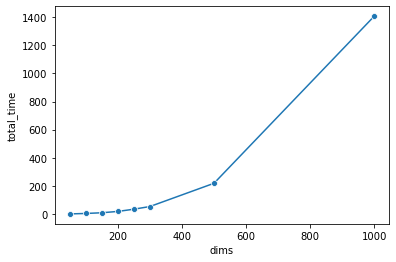

In [31]:
import seaborn as sns
dims = list(matches.keys())
total_t = [matches[i]["total"] for i in matches]
checked_r = [matches[i]["checked/total"] for i in matches]

df = pd.DataFrame(zip(dims, total_t, checked_r), columns = ["dims", "total_time", "checked_ratio"])
sns.lineplot(data = df.drop(["checked_ratio"], axis = 1), x = "dims", y = "total_time", marker="o")



In [34]:
1400 / 200 

7.0

<AxesSubplot:xlabel='dims', ylabel='checked_ratio'>

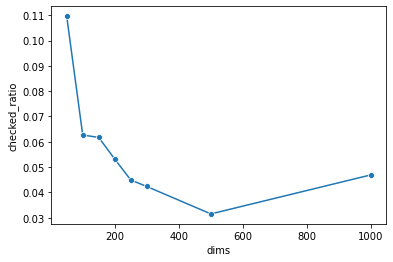

In [33]:
sns.lineplot(data = df.drop(["total_time"], axis = 1), x = "dims", y = "checked_ratio", marker = "o")

In [8]:
df_a
df_a.loc[(df_a["human"] > 2145)].values

array([[5.74700000e+03, 1.40830000e+04, 6.25250128e-01],
       [3.66700000e+03, 1.63670000e+04, 5.22155965e-01],
       [6.92900000e+03, 2.14060000e+04, 1.92512311e-01],
       [4.69200000e+03, 1.79840000e+04, 1.64109672e-01],
       [7.53100000e+03, 2.26270000e+04, 1.48382269e-01],
       [3.71700000e+03, 2.07790000e+04, 1.08850740e-01],
       [2.26000000e+03, 2.16870000e+04, 9.46908811e-02],
       [3.39900000e+03, 1.59030000e+04, 9.24244096e-02],
       [3.64300000e+03, 1.13500000e+04, 6.56273873e-02],
       [3.55200000e+03, 1.35550000e+04, 5.56616440e-02],
       [8.65100000e+03, 1.36440000e+04, 4.99695098e-02],
       [4.06600000e+03, 2.13490000e+04, 4.68507437e-02],
       [3.98400000e+03, 1.10157000e+05, 3.71961380e-02],
       [3.79100000e+03, 2.64000000e+04, 2.31061254e-02],
       [7.32900000e+03, 2.21950000e+04, 2.20546685e-02],
       [5.59900000e+03, 1.87540000e+04, 2.08695094e-02],
       [1.09710000e+04, 2.25870000e+05, 2.01622605e-02],
       [2.35980000e+04, 2.06830

In [122]:
import numpy as np

def isorank(R1, R2, E, alpha=0.7, epoch = 10):
    """
    Compute the ISORANK matches from adjacency matrices R1, R2.

    E is the sequence based similarity score.action
    
    E : numpy matrix {m x n}, sequence similarity score
    """
    
    
    m, _ = R1.shape
    n, _ = R2.shape
    
    R  = np.random.randn(m, n)
    R /= np.max(R)
    
    def construct_A():
        ## Initialize A as a zero tensor 
        
        A  = np.zeros((m, n, m, n), dtype = np.float32)
        
        # Compute D1 and D2; The degree matrices for the adjacencies R1 and R2
        D1 = R1 @ np.ones((m, 1)).reshape(-1)
        D2 = R2 @ np.ones((n, 1)).reshape(-1)
        
        # Get the non-zero indices for R1 and R2
        R1_idx = np.nonzero(R1)
        R2_idx = np.nonzero(R2)
        
        # Get the corresponding non-zero values
        R1_vals = R1[R1_idx[0], R1_idx[1]]
        R2_vals = R2[R2_idx[0], R2_idx[1]]
        
        # After getting the values, transpose
        R1_idx = np.transpose(R1_idx)
        R2_idx = np.transpose(R2_idx)
        
        # ids for A is the cartesian product of the R1_vals and R2_vals
        # Cartesian product of all axes to produce indices for A with non-zero values
        A_idx = np.concatenate([np.tile(R1_idx, (R2_idx.shape[0], 1)),
                               np.repeat(R2_idx, R1_idx.shape[0], axis = 0)], axis = 1)
        
        # Split the indices of A with non-zero values to get i, j, u, v in A[i, j](u, v)
        is_, us, js, vs = [r.squeeze() for r in np.split(A_idx, 4, axis = 1)]
        A[is_, js, us, vs] = 1 / (D1[us] * D2[vs])
        return A
    
    A = construct_A()
    
    def update_R(R, A):
        """
        Computes R = AR operation. 
        R_{i, j} = \alpha * \sum_{u, v}(A_{i, j}(u, v) A(u, v)) + (1-\alpha) E_{i, j} 
        """
        R = np.sum(A * np.expand_dims(R, axis = (0, 1)), axis = (2,3), keepdims = False)
        if E is not None:
            R = (1 - alpha) * R + alpha * E
        return R

    for i in range(epoch):
        R = update_R(R, A)
    return R

    

In [125]:
R1 = np.random.randint(10, size = [10,10])
R1 = R1 + R1.T
R1 = np.where(R1 > 10, 1, 0)
np.fill_diagonal(R1, 0)

R2 = np.random.randint(10, size = [8,8])
R2 = R2 + R2.T
R2 = np.where(R2 > 10, 1, 0)
np.fill_diagonal(R2, 0)

E = np.absolute(np.random.randn(10, 8))

R10 = isorank(R1, R2, E, epoch=10) 
R20 = isorank(R1, R2, E, epoch=20)
np.linalg.norm(R10 - R20)

5.202659145034875e-05

In [126]:
R30 = isorank(R1, R2, E, epoch=30)
np.linalg.norm(R20 - R30)

3.4323026408677927e-10